In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from matplotlib import pyplot

In [22]:
dataset17 = pd.read_csv("cbb-data/cbb17.csv")
dataset19 = pd.read_csv("cbb-data/cbb19.csv")
dataset20 = pd.read_csv("cbb-data/cbb20.csv")
print(dataset19.keys())

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')


In [50]:
cleaned17 = dataset17.dropna()
cleaned17 = cleaned17[cleaned17.POSTSEASON != "R68"]
#dummies = pd.get_dummies(cleaned17.CONF)
cleaned17 = cleaned17.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned17['G'] = cleaned17['G'] - cleaned17['POSTSEASON'] - 1
index = (cleaned17[cleaned17['POSTSEASON']== 6].index.values)
cleaned17.at[1, 'G'] = cleaned17.at[index[0],'G'] + 1
cleaned17['W'] = cleaned17['W'] - cleaned17['POSTSEASON']

cleaned19 = dataset19.dropna()
cleaned19.at[49, 'CONF'] = 'ASun'
cleaned19 = cleaned19[cleaned19.POSTSEASON != "R68"]
#dummies2 = pd.get_dummies(cleaned19.CONF)
cleaned19 = cleaned19.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned19['G'] = cleaned19['G'] - cleaned19['POSTSEASON'] - 1
index = (cleaned19[cleaned19['POSTSEASON']== 6].index.values)
cleaned19.at[index[0], 'G'] = cleaned19.at[index[0],'G'] + 1
cleaned19['W'] = cleaned19['W'] - cleaned19['POSTSEASON']

cleaned20 = dataset20.dropna()
cleaned20.drop(cleaned20.loc[65:352].index, inplace=True)
cleaned20.at[49, 'CONF'] = 'ASun'
cleaned20 = cleaned20.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})

In [51]:
cleaned17 = cleaned17.drop(["TEAM"], axis=1)
cleaned17 = cleaned17.drop(["CONF"], axis=1)
cleaned17=(cleaned17-cleaned17.mean())/cleaned17.std()
#cleaned17 = cleaned17.join(dummies)
#cleaned17 = cleaned17.drop(["ACC"], axis=1)
outputs17 = cleaned17["POSTSEASON"]
cleaned17 = cleaned17.drop(["POSTSEASON"], axis=1)
cleaned17 = cleaned17.drop(["SEED"], axis=1)

teams19 = cleaned19["TEAM"]
cleaned19 = cleaned19.drop(["TEAM"], axis=1)
cleaned19 = cleaned19.drop(["CONF"], axis=1)
cleaned19=(cleaned19-cleaned19.mean())/cleaned19.std()
#cleaned19 = cleaned19.join(dummies2)
#cleaned19 = cleaned19.drop(["ACC"], axis=1)
outputs19 = cleaned19["POSTSEASON"]
cleaned19 = cleaned19.drop(["POSTSEASON"], axis=1)
cleaned19 = cleaned19.drop(["SEED"], axis=1)

teams20 = cleaned20["TEAM"]
cleaned20 = cleaned20.drop(["TEAM", "CONF", "RK"], axis=1)
cleaned20=(cleaned20-cleaned20.mean())/cleaned20.std()
cleaned20

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,-1.391338,1.885242,1.180317,-2.010964,2.090749,1.000220,-1.597001,3.785166e-01,-0.224017,0.580421,-0.365319,0.503593,-1.368856,1.444383,-1.644366,-0.013414,-0.611617,-0.299180,2.711099
1,-1.391338,1.307220,0.822019,-1.788933,1.878895,-0.576551,-0.745209,-1.081476e-01,1.786100,1.367947,1.003078,-0.557118,-0.019395,-1.150866,-0.738571,0.365666,-0.274233,-0.751428,2.006703
2,2.429942,2.752275,2.344787,0.082469,1.794565,2.393645,0.617659,-1.459993e+00,-0.322071,0.826523,-1.854456,1.140020,-1.617441,2.321156,0.620121,1.692444,0.231844,1.434438,1.761696
3,-0.117578,2.174253,1.941701,-0.203000,1.739031,3.200365,0.049797,3.842175e-15,-0.125962,-0.945409,-0.284825,0.100523,-0.001639,4.039632,-0.421543,1.123825,0.794151,-0.261492,1.486063
4,-0.117578,0.151175,0.889200,-0.869092,1.494269,0.596860,-1.824146,5.407381e-02,-1.596780,0.629642,-0.526306,-0.557118,-0.285736,0.742964,-1.191469,0.251942,-1.623771,0.416880,0.996049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.117578,-1.004869,-1.193409,-0.012687,-1.407914,-0.869904,-0.745209,5.407381e-02,1.148746,0.457371,0.520115,0.715735,3.922452,-0.449447,-0.149805,-1.188560,-1.117694,1.773625,-1.331520
61,-0.117578,-1.293881,-0.790323,0.463093,-1.409971,-0.796565,-0.347706,1.351845e+00,0.266256,0.063608,1.123819,0.821806,0.779628,-0.309164,-0.919730,-1.074836,0.850382,-1.165989,-1.239642
62,-0.117578,-0.137836,-2.380272,-1.535184,-1.420255,-0.466544,-3.016655,2.325174e+00,0.560419,-0.059443,0.842090,1.373376,0.726360,-0.274093,-2.414292,-0.468309,-2.017386,1.811312,-0.596498
63,-2.665098,1.018208,0.217391,1.826996,-1.498414,1.403580,1.128734,3.244428e-01,-1.694834,-0.330155,-1.934950,-1.235973,-0.907199,0.637751,0.529542,1.692444,1.187766,-0.939864,-0.320865


In [25]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(cleaned17, outputs17)
# Make predictions using the testing set
ncaa_pred = regr.predict(cleaned19)

Feature: 0, Score: -0.20767
Feature: 1, Score: 0.43309
Feature: 2, Score: 1.33856
Feature: 3, Score: -1.90193
Feature: 4, Score: -1.15969
Feature: 5, Score: -0.83532
Feature: 6, Score: -1.03858
Feature: 7, Score: -0.03690
Feature: 8, Score: -0.38243
Feature: 9, Score: -0.00039
Feature: 10, Score: 0.13176
Feature: 11, Score: 0.04858
Feature: 12, Score: 0.00585
Feature: 13, Score: 0.48131
Feature: 14, Score: 1.07911
Feature: 15, Score: 0.12220
Feature: 16, Score: 0.86016
Feature: 17, Score: 0.22061
Feature: 18, Score: -0.74790


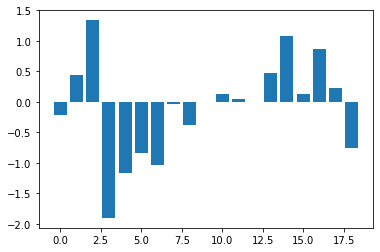

In [26]:
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
#features importances for 19
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(regr.coef_)):
    print(cleaned19.columns[i], ": ", regr.coef_[i])


# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(outputs19, ncaa_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, ncaa_pred))

Features - Coefficients:
-------------------------------
G :  -0.2076744947299072
W :  0.4330926461017093
ADJOE :  1.3385632352222117
ADJDE :  -1.901933890830219
BARTHAG :  -1.1596932239630486
EFG_O :  -0.8353239300629284
EFG_D :  -1.0385773269016412
TOR :  -0.03690029964799428
TORD :  -0.3824304291758191
ORB :  -0.0003928672060958733
DRB :  0.1317635921626458
FTR :  0.048576034776714856
FTRD :  0.005847976343556601
2P_O :  0.4813075048615621
2P_D :  1.0791062674709313
3P_O :  0.12220412555723106
3P_D :  0.860164156413767
ADJ_T :  0.22060503221562996
WAB :  -0.7478987929755263

Mean squared error: 0.58
Coefficient of determination: 0.41


In [28]:
fullData = pd.read_csv("cbb-data/cbb.csv")
cleaned = fullData.dropna()
cleaned = cleaned[cleaned.POSTSEASON != "R68"]
cleaned = cleaned.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned['G'] = cleaned['G'] - cleaned['POSTSEASON'] - 1
index = (cleaned[cleaned['POSTSEASON']== 6].index.values)
cleaned.at[index[0], 'G'] = cleaned.at[index[0],'G'] + 1
cleaned.at[index[1], 'G'] = cleaned.at[index[1],'G'] + 1
cleaned.at[index[2], 'G'] = cleaned.at[index[2],'G'] + 1
cleaned.at[index[3], 'G'] = cleaned.at[index[3],'G'] + 1
cleaned.at[index[4], 'G'] = cleaned.at[index[4],'G'] + 1
cleaned['W'] = cleaned['W'] - cleaned['POSTSEASON']
#cleaned20 = cleaned
cleaned20 = cleaned[cleaned.YEAR != 2020]
cleaned = cleaned[cleaned.YEAR != 2019]

cleaned = cleaned.drop(["TEAM"], axis=1)
cleaned = cleaned.drop(["YEAR"], axis=1)
cleaned = cleaned.drop(["CONF"], axis=1)
cleaned = cleaned.drop(["SEED"], axis=1)
cleaned=(cleaned-cleaned.mean())/cleaned.std()
outputs = cleaned["POSTSEASON"]
cleaned = cleaned.drop(["POSTSEASON"], axis=1)

In [29]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(cleaned, outputs)
# Make predictions using the testing set
ncaa_pred = regr.predict(cleaned19)

In [30]:
#features importances for 19
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(regr.coef_)):
    print(cleaned19.columns[i], ": ", regr.coef_[i])

# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(outputs19, ncaa_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, ncaa_pred))

Features - Coefficients:
-------------------------------
G :  -0.1238514639966329
W :  0.36329336277657376
ADJOE :  1.2469512005121133
ADJDE :  -1.617661820334446
BARTHAG :  -1.2015355353886317
EFG_O :  -0.17459609583641203
EFG_D :  0.16408186741482877
TOR :  -0.017083736327054358
TORD :  -0.25671288206542026
ORB :  -0.045650906069718444
DRB :  0.31538017115139705
FTR :  -0.020871060032251563
FTRD :  0.006954197068904345
2P_O :  0.18481636971707507
2P_D :  0.1808216160965908
3P_O :  -0.05562029737916488
3P_D :  0.12203772205395823
ADJ_T :  0.024768558105013085
WAB :  -0.495853123088832

Mean squared error: 0.38
Coefficient of determination: 0.61


In [31]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# find best params and score for Ridge
ridge = Ridge()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)

ridge_regressor.fit(cleaned, outputs)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-0.8030831760888384


In [32]:
ridge = Ridge(alpha=1e-3)
ridge.fit(cleaned,outputs)
predictions = ridge.predict(cleaned19)
#features importances for 19
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(ridge.coef_)):
    print(cleaned19.columns[i], ": ", ridge.coef_[i])
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(outputs19, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, predictions))

Features - Coefficients:
-------------------------------
G :  -0.12380093504698587
W :  0.3631713114981346
ADJOE :  1.2467290895222303
ADJDE :  -1.617359265311438
BARTHAG :  -1.2013515658401888
EFG_O :  -0.17430676032193174
EFG_D :  0.1638100693558476
TOR :  -0.017106639321813284
TORD :  -0.256609786800154
ORB :  -0.045614452902065436
DRB :  0.31531220578738356
FTR :  -0.020868338419377297
FTRD :  0.00692168664981806
2P_O :  0.1846486557143112
2P_D :  0.18094685090586593
3P_O :  -0.05572981648477714
3P_D :  0.1221043439607997
ADJ_T :  0.024768322086841592
WAB :  -0.49565469757787434

Mean squared error: 0.38
Coefficient of determination: 0.61


In [33]:
from sklearn.linear_model import Lasso

# find best params and score for Lasso
lasso = Lasso()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)

lasso_regressor.fit(cleaned, outputs)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.7396258142853833


In [34]:
lasso = Lasso(alpha=1e-3)
lasso.fit(cleaned,outputs)
predictions = lasso.predict(cleaned19)
#features importances for 19
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(lasso.coef_)):
    print(cleaned19.columns[i], ": ", lasso.coef_[i])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(outputs19, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, predictions))

Features - Coefficients:
-------------------------------
G :  -0.10567116265732378
W :  0.3149213853264087
ADJOE :  1.1811706429014683
ADJDE :  -1.5350333978567774
BARTHAG :  -1.1652923085560076
EFG_O :  -0.0
EFG_D :  0.127912526063067
TOR :  -0.026753630182952133
TORD :  -0.22434373741956215
ORB :  -0.030315940330615552
DRB :  0.29149893344904726
FTR :  -0.01740353210698382
FTRD :  -0.0
2P_O :  0.07698151002947833
2P_D :  0.18013012330303804
3P_O :  -0.1255478386221968
3P_D :  0.11855663808548171
ADJ_T :  0.023422294744229244
WAB :  -0.42432646463898893
Mean squared error: 0.38
Coefficient of determination: 0.62


In [35]:
#random classifier, and fit
randTree = RandomForestRegressor(min_samples_split=20, random_state=5);
randTree.fit(cleaned,outputs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [36]:
#get team name info to print
teams=teams19

labels=outputs19

cleaned19

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,0.266300,1.528551,2.042572,-1.132484,1.073843,2.460166,-1.566239,-1.786817,0.010948,0.338659,-0.258338,0.390565,-1.264927,3.016431,-1.347685,0.262195,-1.161525,1.304614,0.951017
1,-0.474709,1.244170,1.972384,-1.132484,1.068618,0.941607,-1.361502,-1.929228,-0.645904,0.058170,-0.736583,-1.103902,-1.164796,0.040748,-0.543228,1.656936,-1.875394,-2.729147,1.772165
2,1.007309,1.244170,1.252960,-1.260798,1.009833,0.302213,-1.238660,0.064530,0.186108,1.384121,0.663992,-0.115625,-1.740545,1.879653,-0.788062,-2.135016,-1.399481,1.875766,1.792193
3,0.266300,0.675406,1.463523,-0.857526,0.968031,0.022479,0.358290,-0.149087,-0.295583,1.307624,-1.624753,-0.838755,-0.639113,-0.092990,0.226254,0.218609,0.313805,2.732493,1.551857
4,1.007309,0.959788,0.498442,-1.920698,1.022243,-0.497028,-1.607186,-2.498873,-0.426954,-1.395277,-0.941545,-1.489571,-1.715513,-0.193294,-1.032897,-0.653104,-1.780211,-0.872903,1.391633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-2.697736,0.675406,-1.905487,0.847215,-1.982937,-0.377142,0.726817,-0.077881,1.893923,-0.808798,0.322389,0.077209,1.839111,-0.962291,0.890806,0.872394,0.218622,-0.444539,-0.971671
62,-1.215718,-0.462120,-1.010593,1.928718,-2.121406,0.781758,1.013449,-0.220292,-0.339373,-1.981755,1.278879,1.113695,-0.839373,0.408529,1.100664,0.872394,0.408988,0.126613,-1.452343
63,-0.474709,-1.599647,-0.905312,2.368651,-2.436881,0.262251,2.282819,-1.217172,-2.003398,-2.415239,-0.565781,-0.356669,-1.114731,-0.092990,1.870145,0.436537,1.979500,-0.658721,-2.173351
64,-0.474709,-2.168410,-1.150969,2.331990,-2.649158,0.062441,1.750502,-0.077881,-0.208003,-1.293281,1.073917,0.752130,-0.614080,0.274791,1.065688,-0.260833,1.789134,1.268917,-2.533854


Gonzaga 2.6043908860515845
Virginia 2.6685458674218343
Duke 1.7397245504521144
North Carolina 1.1145819678712479
Michigan 1.8590306483321775
Michigan St. 1.3880564346709492
Kentucky 0.9952711808532981
Tennessee 1.2504223513236008
Texas Tech 2.4781814590481077
Purdue 0.9780152521617506
Houston 0.40156877999586454
LSU 0.3946052555375189
Virginia Tech 0.7156053957341831
Kansas St. 0.44986587154583274
Florida St. 0.5513424455097296
Kansas 0.4083981308140841
Auburn 0.7633108184111179
Wisconsin 0.572213119490693
Mississippi St. -0.12151954454207525
Marquette -0.3111888658969363
Iowa St. 0.3730286964005909
Maryland -0.21764746253876255
Buffalo 0.30262018474307906
Villanova -0.46990937113111003
Louisville -0.11718197975634262
Wofford -0.08898606882522467
Cincinnati 0.23888710701132257
Nevada -0.033354498434318244
VCU 0.20844906464104102
Syracuse -0.05330015271894836
Mississippi -0.43429538418350366
Utah St. -0.43712080141394816
UCF -0.02276267320129399
Oklahoma -0.13091126351968063
Baylor -0.4

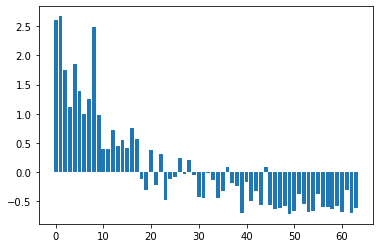

In [37]:
#probabilies for each Class

teams=teams.to_numpy()

#get predicted outcomes for each team and print!
outcomes=randTree.predict(cleaned19)

for i in range(len(teams)):
    print(teams[i], outcomes[i])

wins=plt.bar([x for x in range(len(outcomes))], outcomes)

In [40]:
#featureImportances for 19
importances19 = randTree.feature_importances_
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(importances19)):
    print(cleaned19.columns[i], ": ", importances19[i])

#from sci learn metrics
print('Mean squared error: %.2f'
      %mean_squared_error(labels, outcomes)) 
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(labels, outcomes))

Features - Coefficients:
-------------------------------
G :  0.0019646088060481983
W :  0.0034074306116071464
ADJOE :  0.014846744932588477
ADJDE :  0.021393592970280345
BARTHAG :  0.6325185654062216
EFG_O :  0.018981766267142323
EFG_D :  0.010344847430585915
TOR :  0.016424742633599675
TORD :  0.017187500530474017
ORB :  0.043056130589435436
DRB :  0.019398811123828085
FTR :  0.011395402082386109
FTRD :  0.012267160677130675
2P_O :  0.03494974193678843
2P_D :  0.011241017692124478
3P_O :  0.023208643294260183
3P_D :  0.015024023178776082
ADJ_T :  0.014043208785947753
WAB :  0.07834606105077503
Mean squared error: 0.31
Coefficient of determination: 0.68


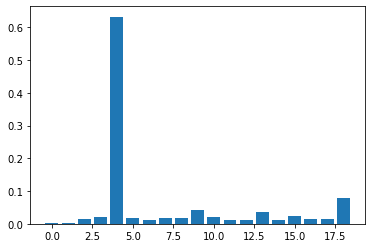

In [39]:
# get importance
# plot feature importance
pyplot.bar([x for x in range(len(importances19))], importances19)
pyplot.show()

Kansas 2.735350036489387
Baylor 2.55776136130939
Gonzaga 2.714587816388914
Dayton 2.741029918622049
Michigan St. 2.520578135785081
Duke 2.4732735597115765
Creighton 2.6581376496891727
Ohio St. 2.4591517892899457
Louisville 2.452240497020915
San Diego St. 2.65587807593172
Villanova 0.9224512494056938
Houston 0.36349229693983093
Arizona 0.7052251683054407
Michigan 0.86472507849729
Penn St. 0.7051692205782051
West Virginia 0.6379276333191668
BYU 0.9155014912726148
Oregon 0.5684355510729535
Wisconsin 0.7096123094800767
Florida St. 0.46197820190908884
Seton Hall 0.36696818529078973
Texas Tech 0.22167005897862502
Purdue 0.28870872261351627
Butler 0.0628533197538711
Providence 0.2783678408128101
Maryland 0.20045093910504314
Minnesota -0.10072126705450828
Kentucky -0.1539356207382533
Illinois -0.21227919316478533
Rutgers -0.2939296153116707
Iowa -0.25230714660753056
Florida -0.6183525204945111
Marquette -0.4637698280173946
Virginia -0.13167685633356765
Wichita St. -0.3493418942122033
Indiana -

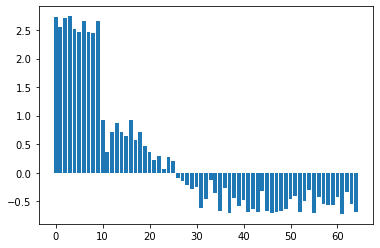

In [52]:
#predicting the 2020 winner using Random Forest Regression
if "TEAM" in cleaned20.columns:
    cleaned20 = cleaned20.drop(["TEAM"], axis=1)
if "CONF" in cleaned20.columns:
    cleaned20 = cleaned20.drop(["CONF"], axis=1)

outcomes=randTree.predict(cleaned20)

for i in range(len(teams20)-1):
    print(teams20[i], outcomes[i])

wins=plt.bar([x for x in range(len(outcomes))], outcomes)

In [53]:
#featureImportances for 20
importances20 = randTree.feature_importances_
print('Features - Coefficients:')
print('-------------------------------')
for i in range(len(importances20)):
    print(cleaned20.columns[i], ": ", importances20[i])

Features - Coefficients:
-------------------------------
G :  0.0019646088060481983
W :  0.0034074306116071464
ADJOE :  0.014846744932588477
ADJDE :  0.021393592970280345
BARTHAG :  0.6325185654062216
EFG_O :  0.018981766267142323
EFG_D :  0.010344847430585915
TOR :  0.016424742633599675
TORD :  0.017187500530474017
ORB :  0.043056130589435436
DRB :  0.019398811123828085
FTR :  0.011395402082386109
FTRD :  0.012267160677130675
2P_O :  0.03494974193678843
2P_D :  0.011241017692124478
3P_O :  0.023208643294260183
3P_D :  0.015024023178776082
ADJ_T :  0.014043208785947753
WAB :  0.07834606105077503
